# Libraries

In [3]:
import pandas as pd
from tqdm import tqdm

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import squarify

In [6]:
df = pd.read_csv('../data/SB_publication_PMC_data.csv', sep='|')
df.head()

,Title,Link,pmc,article_type,language,journal,publisher,publication_year
0,Mice in Bion-M 1 space mission: training and s...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,4136787,research article,en,PLoS ONE,PLOS,2014
1,Microgravity induces pelvic bone loss through ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,3630201,research article,en,PLoS ONE,PLOS,2013
2,Stem Cell Health and Tissue Regeneration in Mi...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,11988870,review article,en,International Journal of Molecular Sciences,Multidisciplinary Digital Publishing Institute...,2025
3,Microgravity Reduces the Differentiation and R...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,7998608,research article,en,Cells,Multidisciplinary Digital Publishing Institute...,2021
4,Microgravity validation of a novel system for ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,5587110,research article,en,PLoS ONE,PLOS,2017


In [7]:
df.rename(columns={"pmc":"PMID","article_type":"Article Type","journal":"Journal","publication_year":"Year"}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         607 non-null    object
 1   Link          607 non-null    object
 2   PMID          607 non-null    int64 
 3   Article Type  607 non-null    object
 4   language      607 non-null    object
 5   Journal       607 non-null    object
 6   publisher     510 non-null    object
 7   Year          607 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 38.1+ KB


In [9]:
df['Link'] = df['Link'].astype("string")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         607 non-null    object
 1   Link          607 non-null    string
 2   PMID          607 non-null    int64 
 3   Article Type  607 non-null    object
 4   language      607 non-null    object
 5   Journal       607 non-null    object
 6   publisher     510 non-null    object
 7   Year          607 non-null    int64 
dtypes: int64(2), object(5), string(1)
memory usage: 38.1+ KB


In [9]:
df[df['publisher'].isna()]

,Title,Link,pmc,article_type,language,journal,publisher,publication_year
9,Effects of ex vivo ionizing radiation on colla...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,6813909,research article,en,Bone,NaN,2019
23,Circulating miRNA spaceflight signature reveal...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,8441986,research article,en,Cell reports,NaN,2020
33,Prolonged Exposure to Microgravity Reduces Car...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,7787258,research article,en,Cell reports,NaN,2020
44,Three routes to modulate the pore size of the ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,3289768,research article,en,ACS Nano,NaN,2012
47,Chimeras reveal a single lipid-interface resid...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,3593973,research article,en,Cell reports,NaN,2013
...,...,...,...,...,...,...,...,...
576,Overexpression of CupB5 activates alginate ove...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,4116675,research article,en,Molecular microbiology,NaN,2014
579,In situ resource utilisation: The potential fo...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,8739323,review article,en,Extremophiles,NaN,2022
580,The smallest space miners: Principles of space...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,8739323,review article,en,Extremophiles,NaN,2022
587,Metagenomic interrogation of urban Superfund s...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,11999716,research article,en,Journal of Applied Microbiology,NaN,2025


In [10]:
df['article_type'].value_counts()

article_type
research article      512
review article         44
brief report           27
correction             12
article commentary      3
other                   3
editorial               2
letter                  1
reply                   1
methods article         1
discussion              1
Name: count, dtype: int64

In [26]:
fig = px.pie(
    df,
    names='article_type',
    title='Type of articles'
)
fig.show()

In [12]:
df['publication_year'].value_counts()

publication_year
2024    78
2021    57
2022    55
2020    53
2023    52
2018    44
2017    41
2019    38
2015    35
2016    32
2013    30
2025    29
2014    23
2011    15
2012    14
2010    11
Name: count, dtype: int64

In [22]:
df_count = df['publication_year'].value_counts().sort_index().reset_index()
df_count.columns = ['publication_year', 'num_articles']

fig = px.line(df_count, x='publication_year', y='num_articles', title='Articles per year')
fig.update_xaxes(
    tickmode='linear', 
    dtick=1,             
)
fig.update_layout(
    xaxis_title='Year of publication',
    yaxis_title='Number of articles'
)
fig.show()

In [13]:
df['journal'].value_counts()

journal
NPJ Microgravity                                                            47
International Journal of Molecular Sciences                                 30
Scientific Reports                                                          29
PLoS ONE                                                                    26
Frontiers in Plant Science                                                  25
                                                                            ..
Micromachines                                                                1
Journal of Otolaryngology - Head & Neck Surgery                              1
The spine journal : official journal of the North American Spine Society     1
Spine                                                                        1
Lab on a Chip                                                                1
Name: count, Length: 205, dtype: int64

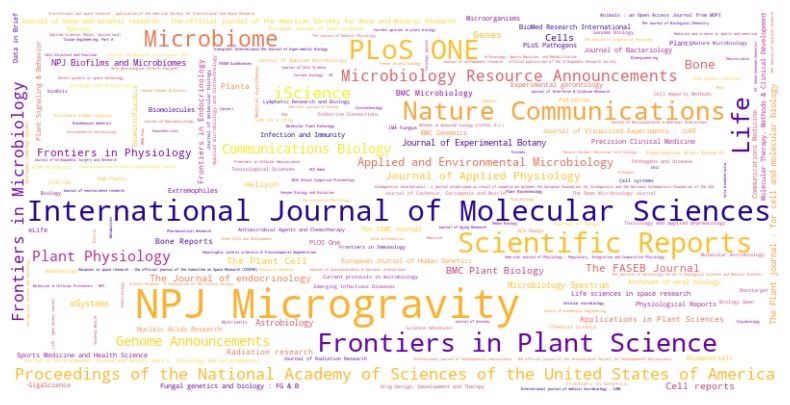

In [28]:
freq = df['journal'].value_counts().to_dict()

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'
).generate_from_frequencies(freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()